### 观察数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X_train = np.array([
    [158,64],
    [170,86],
    [183,84],
    [191,80],
    [155,49],
    [163,59],
    [180,67],
    [158,54],
    [170,67],
])
y_train = ['male','male','male','male','female','female','female','female','female']

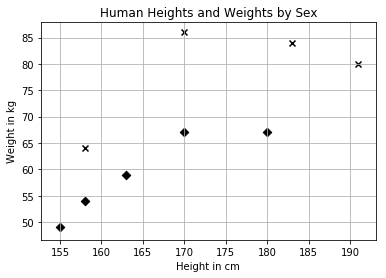

In [7]:
plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

for i,x in enumerate(X_train):
    plt.scatter(x[0],x[1],c='k',marker='x' if y_train[i] == 'male' else 'D')
    plt.grid(True)
plt.show()

### 计算距离

In [9]:
x = np.array([[155,70]])
distances = np.sqrt(np.sum((X_train - x) ** 2,axis=1))
distances

array([ 6.70820393, 21.9317122 , 31.30495168, 37.36308338, 21.        ,
       13.60147051, 25.17935662, 16.2788206 , 15.29705854])

In [10]:
neareat_neighbor_indices = distances.argsort()[:3]

In [12]:
neareat_neighbor_genders = np.take(y_train,neareat_neighbor_indices)
neareat_neighbor_genders

array(['male', 'female', 'female'], dtype='<U6')

In [13]:
from collections import Counter

In [14]:
b = Counter(np.take(y_train,distances.argsort()[:3]))


In [19]:
b.most_common(1)[0][0]

'female'

## 分类

In [20]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

In [22]:
lb = LabelBinarizer() #实例化
y_train_binarized = lb.fit_transform(y_train) #将训练数据转为二元分类
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [24]:
y_train #做个对比

['male',
 'male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female']

In [25]:
K = 3
clf = KNeighborsClassifier(n_neighbors=K) #规定分类参数
clf.fit(X_train,y_train_binarized.reshape(-1)) #训练数据
prediction_binarized = clf.predict(np.array([155,70]).reshape(1,-1))[0] #预测

predict_label = lb.inverse_transform(prediction_binarized)
predict_label

array(['female'], dtype='<U6')

#### 应用

In [33]:
X_test = np.array([
    [168,65],
    [180,96],
    [160,52],
    [169,67]
])
y_test = ['male','male','female','female']
y_test_binarized = lb.transform(y_test) #二元化
print('Binarized labels: %s' % y_test_binarized.T[0])

predictions_binarized = clf.predict(X_test)
print('Binarized predictions:%s'% predictions_binarized)
print('Predicted labels:%s'%lb.inverse_transform(predictions_binarized))

Binarized labels: [1 1 0 0]
Binarized predictions:[0 1 0 0]
Predicted labels:['female' 'male' 'female' 'female']


#### 评估

In [35]:
#准确度
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_test_binarized,predictions_binarized))

Accuracy: 0.75


In [37]:
#precision
from sklearn.metrics import precision_score
print('Precision : %s'  %precision_score(y_test_binarized,predictions_binarized))

Precision : 1.0


In [38]:
#召回率
from sklearn.metrics import recall_score
print('Recall : %s' %recall_score(y_test_binarized,predictions_binarized))

Recall : 0.5


In [39]:
#F1
from sklearn.metrics import f1_score
print('F1 score : %s' %f1_score(y_test_binarized,predictions_binarized))

F1 score : 0.6666666666666666


In [40]:
#matthews_corrcoef
from sklearn.metrics import matthews_corrcoef
print('Matthews correlation coefficient: %s' %matthews_corrcoef(y_test_binarized,predictions_binarized))

Matthews correlation coefficient: 0.5773502691896258


In [43]:
#大杂烩
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized,predictions_binarized,target_names=['male'],labels = [1]))


             precision    recall  f1-score   support

       male       1.00      0.50      0.67         2

avg / total       1.00      0.50      0.67         2



## 回归

In [53]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [54]:
X_train = np.array([
    [158,1],
    [170,1],
    [183,1],
    [191,1],
    [155,0],
    [163,0],
    [180,0],
    [158,0],
    [170,0]
])
y_train = [64,86,84,80,49,59,67,54,67]

X_test = np.array([
    [168,1],
    [180,1],
    [160,0],
    [169,0]
])
y_test = [65,96,52,67]

In [55]:
K = 3
clf = KNeighborsRegressor(n_neighbors=K)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print('Predicted weights: %s' % predictions)
print('Coefficient of detemination: %s' % r2_score(y_test,predictions))
print('Mean absolute error: %s' % mean_absolute_error(y_test,predictions))
print('Mean squared error:%s'%mean_squared_error(y_test,predictions))

Predicted weights: [70.66666667 79.         59.         70.66666667]
Coefficient of detemination: 0.6290565226735438
Mean absolute error: 8.333333333333336
Mean squared error:95.8888888888889


### 刻度特征

In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() #实例化
X_train_scaled = ss.fit_transform(X_train) #转换

print(X_train)
print(X_train_scaled) #对比下

[[158   1]
 [170   1]
 [183   1]
 [191   1]
 [155   0]
 [163   0]
 [180   0]
 [158   0]
 [170   0]]
[[-0.9908706   1.11803399]
 [ 0.01869567  1.11803399]
 [ 1.11239246  1.11803399]
 [ 1.78543664  1.11803399]
 [-1.24326216 -0.89442719]
 [-0.57021798 -0.89442719]
 [ 0.86000089 -0.89442719]
 [-0.9908706  -0.89442719]
 [ 0.01869567 -0.89442719]]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
X_test_scaled = ss.transform(X_test) #测试集转化

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [59]:
clf.fit(X_train_scaled,y_train)
predictions = clf.predict(X_test_scaled) #预测
print('Predicted weights:%s' % predictions)
print('Coefficient of determination: %s' % r2_score(y_test,predictions))
print('Mean absolute error:%s'% mean_absolute_error(y_test,predictions))
print('Mesan squared error:%s'%mean_squared_error(y_test,predictions))

Predicted weights:[78.         83.33333333 54.         64.33333333]
Coefficient of determination: 0.6706425961745109
Mean absolute error:7.583333333333336
Mesan squared error:85.13888888888893
